In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Dropout
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import Callback
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing import image
from keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile

In [4]:
import zipfile
# Nama file ZIP yang ingin dibaca
zip_file_name = r"C:\Users\tania\Downloads\skin-tone-image-data.zip"

# Membuka file ZIP untuk membacanya
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    # Daftar nama file di dalam ZIP
    file_list = zip_ref.namelist()
    
    # Mengekstrak semua file dalam ZIP
    zip_ref.extractall()

# Menampilkan daftar file yang diekstrak
print("File yang diekstrak:", file_list)


File yang diekstrak: ['Test/Dark_deep/D1.jpg', 'Test/Dark_deep/D10.jpg', 'Test/Dark_deep/D100.jpg', 'Test/Dark_deep/D101.jpg', 'Test/Dark_deep/D102.jpg', 'Test/Dark_deep/D103.jpg', 'Test/Dark_deep/D104.jpg', 'Test/Dark_deep/D105.jpg', 'Test/Dark_deep/D106.jpg', 'Test/Dark_deep/D107.jpg', 'Test/Dark_deep/D108.jpg', 'Test/Dark_deep/D109.jpg', 'Test/Dark_deep/D11.jpg', 'Test/Dark_deep/D110.jpg', 'Test/Dark_deep/D111.jpg', 'Test/Dark_deep/D112.jpg', 'Test/Dark_deep/D113.jpg', 'Test/Dark_deep/D114.jpg', 'Test/Dark_deep/D115.jpg', 'Test/Dark_deep/D116.jpg', 'Test/Dark_deep/D117.jpg', 'Test/Dark_deep/D118.jpg', 'Test/Dark_deep/D119.jpg', 'Test/Dark_deep/D12.jpg', 'Test/Dark_deep/D120.jpg', 'Test/Dark_deep/D121.jpg', 'Test/Dark_deep/D122.jpg', 'Test/Dark_deep/D123.jpg', 'Test/Dark_deep/D124.jpg', 'Test/Dark_deep/D125.jpg', 'Test/Dark_deep/D126.jpg', 'Test/Dark_deep/D127.jpg', 'Test/Dark_deep/D128.jpg', 'Test/Dark_deep/D129.jpg', 'Test/Dark_deep/D13.jpg', 'Test/Dark_deep/D130.jpg', 'Test/Dark_d

In [5]:
# Function to print directory tree
def print_directory_tree(directory, indent=0, max_depth=2):
    if max_depth == 0:
        return

    for entry in os.listdir(directory):
        entry_path = os.path.join(directory, entry)
        print("-" * indent + entry)

        if os.path.isdir(entry_path) and max_depth > 1:
            print_directory_tree(entry_path, indent + 1, max_depth - 1)

In [6]:
# Specify the directory path
directory = r"C:\Users\tania\Downloads\skin-tone-image-data\test" 

In [7]:
# Print the directory tree with max_depth 2
print_directory_tree(directory, max_depth=2)

Dark_deep
-D1.jpg
-D10.jpg
-D100.jpg
-D101.jpg
-D102.jpg
-D103.jpg
-D104.jpg
-D105.jpg
-D106.jpg
-D107.jpg
-D108.jpg
-D109.jpg
-D11.jpg
-D110.jpg
-D111.jpg
-D112.jpg
-D113.jpg
-D114.jpg
-D115.jpg
-D116.jpg
-D117.jpg
-D118.jpg
-D119.jpg
-D12.jpg
-D120.jpg
-D121.jpg
-D122.jpg
-D123.jpg
-D124.jpg
-D125.jpg
-D126.jpg
-D127.jpg
-D128.jpg
-D129.jpg
-D13.jpg
-D130.jpg
-D131.jpg
-D132.jpg
-D133.jpg
-D134.jpg
-D135.jpg
-D136.jpg
-D137.jpg
-D138.jpg
-D139.jpg
-D14.jpg
-D140.jpg
-D141.jpg
-D142.jpg
-D143.jpg
-D144.jpg
-D145.jpg
-D146.jpg
-D147.jpg
-D148.jpg
-D149.jpg
-D15.jpg
-D150.jpg
-D151.jpg
-D152.jpg
-D153.jpg
-D154.jpg
-D155.jpg
-D156.jpg
-D157.jpg
-D158.jpg
-D159.jpg
-D16.jpg
-D160.jpg
-D161.jpg
-D162.jpg
-D163.jpg
-D164.jpg
-D165.jpg
-D166.jpg
-D167.jpg
-D168.jpg
-D169.jpg
-D17.jpg
-D170.jpg
-D171.jpg
-D172.jpg
-D173.jpg
-D174.jpg
-D175.jpg
-D176.jpg
-D177.jpg
-D178.jpg
-D179.jpg
-D18.jpg
-D180.jpg
-D181.jpg
-D182.jpg
-D183.jpg
-D184.jpg
-D185.jpg
-D186.jpg
-D187.jpg
-D188.jpg
-D189.jpg
-

In [8]:
# Function to load data and resize images to (224, 224)
def load_data(folder_path, target_size=(224, 224)):
    X_data = []
    y_data = []

    for class_name in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_name)

        for file_name in os.listdir(class_path):
            file_path = os.path.join(class_path, file_name)

            image = Image.open(file_path)
            image = image.resize(target_size)  # Resize image
            image_array = np.array(image)

            if image_array.shape == (224, 224, 3):  # Ensure image has correct shape
                X_data.append(image_array)
                y_data.append(class_name)

    return np.array(X_data), np.array(y_data)

In [9]:
# Define paths to your data folders
train_folder = r"C:\Users\tania\Downloads\skin-tone-image-data\Train"
test_folder = r"C:\Users\tania\Downloads\skin-tone-image-data\test"
validation_folder = r"C:\Users\tania\Downloads\skin-tone-image-data\Valid"


In [10]:
# Load training, testing, and validation data
X_train, y_train = load_data(train_folder)
X_test, y_test = load_data(test_folder)
X_val, y_val = load_data(validation_folder)

In [11]:
# Normalize pixel values to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

In [12]:
# Encode the labels using OneHotEncoder
enc = OneHotEncoder(sparse_output=False)
y_train_encoded = enc.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = enc.transform(y_test.reshape(-1, 1))
y_val_encoded = enc.transform(y_val.reshape(-1, 1))

classes_with_indices = [(index, class_label) for index, class_label in enumerate(enc.categories_[0])]

In [15]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [16]:
# Define the VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg16.trainable = False

In [17]:
# Add custom classification layers
x = vgg16.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(len(classes_with_indices), activation='softmax')(x)

In [18]:
# Create the complete model
model_vgg = Model(inputs=vgg16.input, outputs=output_layer)

model_vgg.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,6

 Total params: 15,109,443 (57.64 MB)

 Trainable params: 394,755 (1.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [19]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model_vgg.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# Train the model
# Custom callback untuk early stopping berdasarkan akurasi
class CustomEarlyStopping(Callback):
    def on_epoch_end(self, epoch, logs=None):
        accuracy = logs.get('accuracy')
        val_accuracy = logs.get('val_accuracy')
        if accuracy >= 0.90 or (val_accuracy and val_accuracy >= 0.90):
            print(f"\nAkurasi mencapai 90% pada epoch {epoch+1}, menghentikan pelatihan.")
            self.model.stop_training = True

# Callback untuk early stopping jika val_loss tidak membaik
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Inisialisasi model dan pelatihan dengan callback
history_vgg = model_vgg.fit(
    X_train,
    y_train_encoded,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val_encoded),
    callbacks=[early_stopping, CustomEarlyStopping()]
)
history_vgg = model_vgg.fit(X_train, y_train_encoded, epochs=100, batch_size=32, validation_data=(X_val, y_val_encoded), callbacks=[early_stopping])

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 389s 10s/step - accuracy: 0.3716 - loss: 1.2099 - val_accuracy: 0.5234 - val_loss: 1.0294
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 402s 10s/step - accuracy: 0.4194 - loss: 1.0592 - val_accuracy: 0.4567 - val_loss: 0.9985
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 410s 10s/step - accuracy: 0.4688 - loss: 0.9967 - val_accuracy: 0.5579 - val_loss: 0.9266
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 415s 10s/step - accuracy: 0.5341 - loss: 0.9459 - val_accuracy: 0.5908 - val_loss: 0.9043
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 409s 10s/step - accuracy: 0.5392 - loss: 0.9354 - val_accuracy: 0.5341 - val_loss: 0.8968
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 410s 10s/step - accuracy: 0.5609 - loss: 0.8981 - val_accuracy: 0.6169 - val_loss: 0.8086
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 411s 10s/step - accuracy: 0.5920 - loss: 0.8572 - val_accuracy: 0.6521 - val_loss: 0.7729
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 403s 10s/step - accuracy: 0.5817 - loss: 0.8652 - val_accu

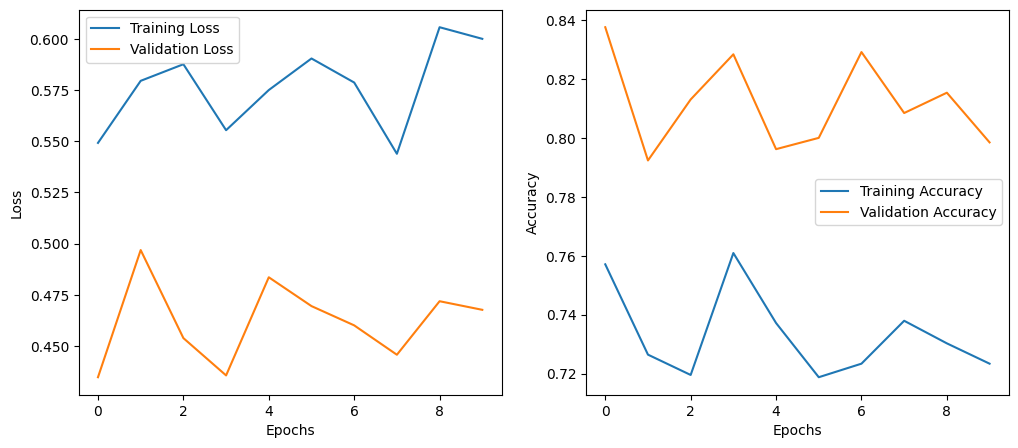

In [21]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['loss'], label='Training Loss')
plt.plot(history_vgg.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['accuracy'], label='Training Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
# Evaluate the model on the test set
loss, accuracy = model_vgg.evaluate(X_test, y_test_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

41/41 ━━━━━━━━━━━━━━━━━━━━ 181s 4s/step - accuracy: 0.8397 - loss: 0.4126
Test Loss: 0.434810608625412
Test Accuracy: 0.8375478982925415


41/41 ━━━━━━━━━━━━━━━━━━━━ 228s 6s/step


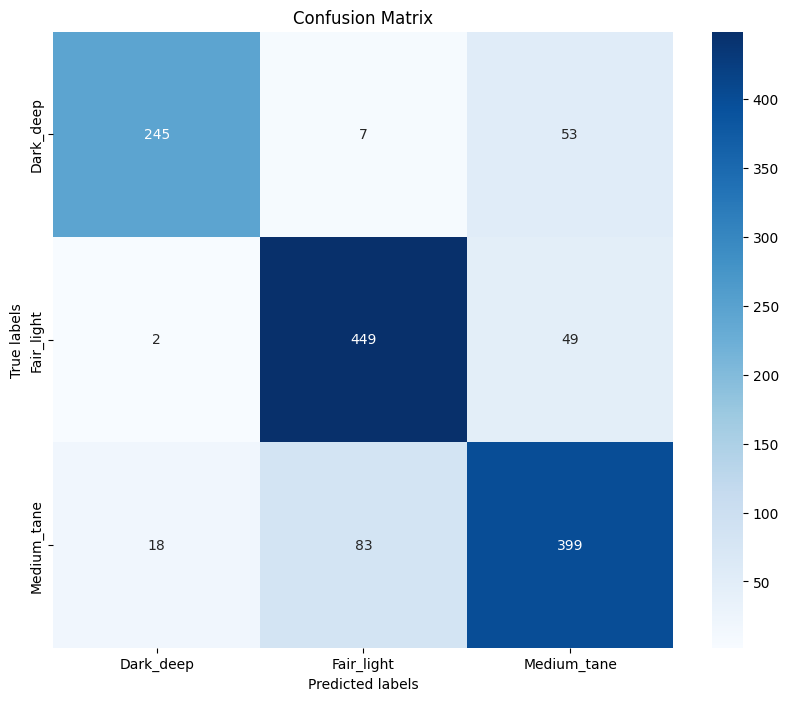

In [23]:
# Predict and plot confusion matrix
y_pred = model_vgg.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_encoded, axis=1)

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=[class_label for _, class_label in classes_with_indices], yticklabels=[class_label for _, class_label in classes_with_indices])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [36]:
# Path untuk menyimpan model
model_directory = r"C:\Users\tania\Downloads"
if not os.path.exists(model_directory):
    os.makedirs(model_directory)


In [39]:

# Menyimpan model VGG dalam format JSON
model_json_path = os.path.join(model_directory, 'model_vgg.json')
with open(model_json_path, 'w') as json_file:
    json_file.write(model_json_path)  # asumsikan model_json adalah variabel yang berisi JSON model


In [43]:
model_weights_path = os.path.join(model_directory, 'model_vgg_weights.bin')
with open(model_weights_path, 'wb') as weights_file:
    weights_file.write(model_weights_path.encode())  # asumsikan model_weights adalah variabel yang berisi bobot model dalam bentuk bytes


In [45]:
# Menyimpan model dalam format H5
model_h5_path = os.path.join(model_directory, 'model_vgg.h5')
model_vgg.save(model_h5_path)

print("Model, bobot, dan model dalam format H5 telah disimpan di:", model_directory)

Model, bobot, dan model dalam format H5 telah disimpan di: C:\Users\tania\Downloads


In [46]:
# Function to handle the uploaded file
def handle_uploaded_file(upload_file):
    # Load and preprocess the uploaded image
    img = image.load_img(upload_file, target_size=(224, 224))  # Input shape expected by your model
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.  # Normalize pixel

    # Make predictions
    predictions = model_vgg.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    confidence_score = predictions[0, predicted_class_index]
    class_label = classes_with_indices[predicted_class_index][1]

    # Display the uploaded image
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted Class: {class_label}, Confidence: {confidence_score:.2f}')
    plt.show()

In [53]:
# Create a file upload widget
files = [r"C:\Users\tania\Downloads\skin-tone-image-data\Test\Dark_deep\D1.jpg"]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


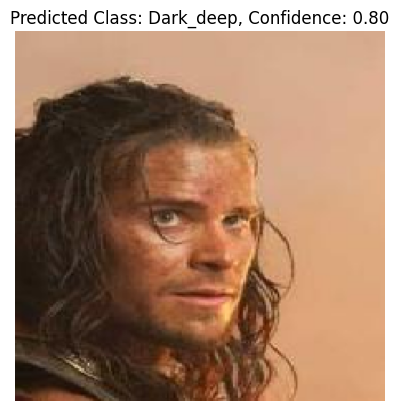

In [54]:
# Process the uploaded file
for filename in files:
    handle_uploaded_file(filename)